In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import paleoscripts as ps

In [2]:
ds = xr.open_dataset("/nesi/nobackup/vuw03367/ka241/5001-5100/srnd_ka241.nc.gz")

In [3]:
# box size
lonmin, lonmax = 130, 145 #140, 155
latmin, latmax = 0, 30

In [4]:
# regrid rnd to a higher resolution in box
rnd = ds.rnd.interp(longitude=np.linspace(lonmin, lonmax, 50), latitude=np.linspace(latmin, latmax, 60))

In [5]:
# season average across all the years
rnd_djf = ps.extract_season(rnd, season='djf').mean(dim=['month', 'year'])
rnd_djf                                                   

<xarray.DataArray 'rnd' (latitude: 60, longitude: 50)>
array([[5.27986697, 5.28503134, 5.29019571, ..., 6.2696363 , 6.21381964,
        6.15800298],
       [5.21786714, 5.22023807, 5.222609  , ..., 5.92520797, 5.88303131,
        5.84085465],
       [5.1558673 , 5.1554448 , 5.15502229, ..., 5.58077965, 5.55224298,
        5.52370632],
       ...,
       [2.37511145, 2.42179493, 2.46847841, ..., 4.89680074, 4.92837464,
        4.95994854],
       [2.16015348, 2.21739474, 2.27463599, ..., 4.78570138, 4.81550133,
        4.84530127],
       [1.94519551, 2.01299454, 2.08079358, ..., 4.67460203, 4.70262801,
        4.730654  ]])
Coordinates:
  * longitude  (longitude) float64 130.0 130.3 130.6 130.9 ... 144.4 144.7 145.0
  * latitude   (latitude) float64 0.0 0.5085 1.017 1.525 ... 28.98 29.49 30.0

In [6]:
# find the lon/lat points where the field is max
xy = ps.find_points_where_field_is_extreme(rnd_djf, extremum='max')

In [7]:
# compute the line that goes across the points
fit = ps.linear_regression_coeffs(xy, cooks_tol=1.e5)


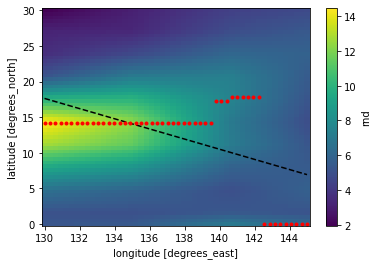

In [8]:
rnd_djf.plot()
xs = np.array([lonmin, lonmax])
ys = fit.intercept + fit.slope * xs
plt.plot(xs, ys, 'k--')
plt.plot(xy[:,0], xy[:, 1], 'r.')
plt.show()